In [233]:
import numpy as np 
import matplotlib.pyplot as plt

import pandas as pd 

pd.options.display.float_format = "{:.2f}".format



In [234]:
sales_data = pd.read_csv(r"C:\Users\ACER\Downloads\python assingments\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")

In [235]:
sales_data

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.00,4.00,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.00,7.00,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.00,3.00,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.00,6.00,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.00,0.00,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.00,0.00,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.00,0.00,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.00,0.00,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.00,0.00,1.31,1.48


## 1. Compare Sales by region for 2016 with 2015 using bar chart

In [236]:
sales_region = sales_data.groupby(["Region"]).agg(sales_2015 = ("Sales2015","sum"),sales_2016 = ("Sales2016","sum"))

<AxesSubplot:xlabel='Region'>

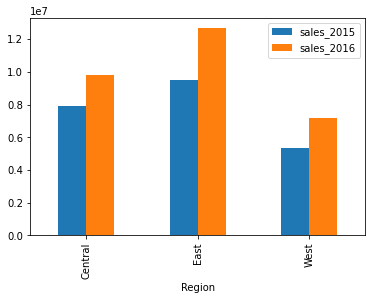

In [237]:
sales_region.plot.bar()

In [238]:
## We can conclude that sales in 2016 is more as compared to sales in 2015 in all regions & also,
## East region has contributed the maximum sales for both 2015 as well as 2016.

## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

Text(0, 0.5, 'SALES_2016')

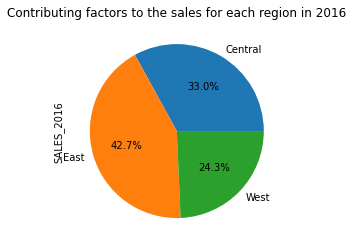

In [239]:
sales_region.sales_2016.plot.pie(autopct='%1.1f%%')
plt.title("Contributing factors to the sales for each region in 2016")
plt.ylabel("SALES_2016")

In [240]:
## East region has contributed 42.7% , that is maximum in 2016.

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [241]:
sales_region_Tiers = sales_data.groupby(["Region","Tier"]).agg(sales_2015 = ("Sales2015","sum"),sales_2016 = ("Sales2016","sum"))

<AxesSubplot:xlabel='Region,Tier'>

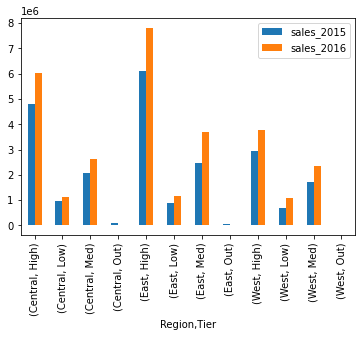

In [242]:
sales_region_Tiers.plot.bar()

In [243]:
## We can conclude form this plot that for 2016 sales East Region of High Tier contributed max.also 
## for 2015 and 2016 East Region of High Tier have max sales 

## 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [244]:
sales_data_east_state = sales_data.groupby(["Region","State"]).agg(sales_2015 = ("Sales2015","sum"),sales_2016 = ("Sales2016","sum"))

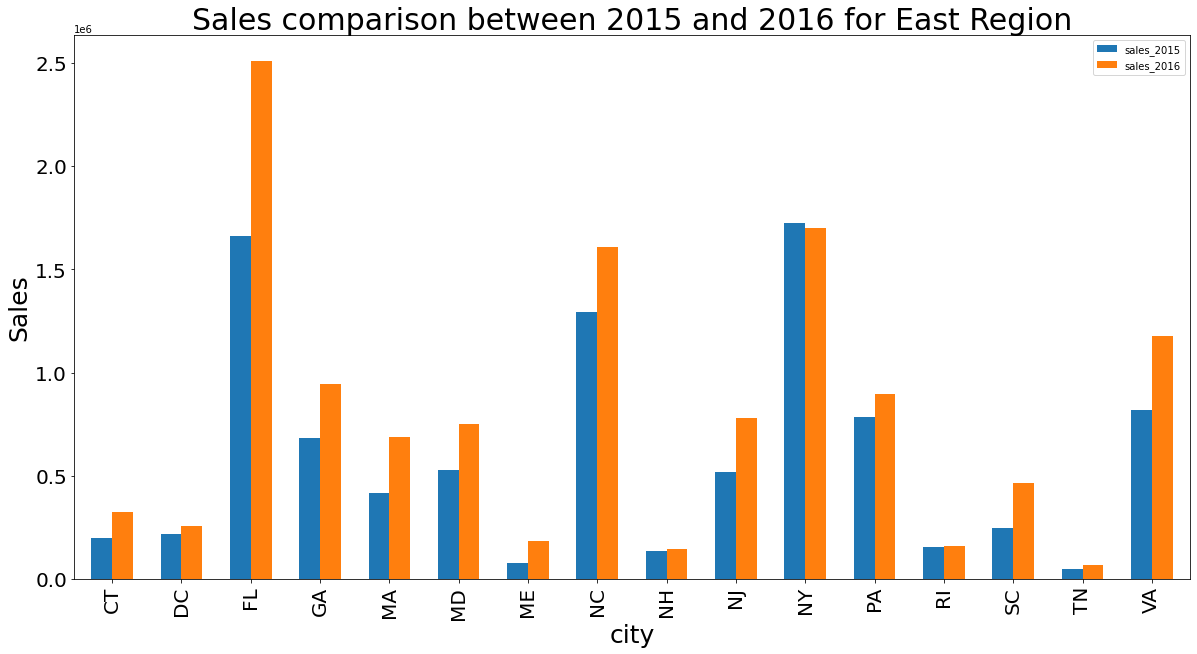

In [245]:
sales_data_east_state.loc["East"].plot.bar(figsize=(20,10),width=0.6, fontsize=20)
plt.ylabel("Sales",fontsize=25)
plt.xlabel("city",fontsize=25)
plt.title("Sales comparison between 2015 and 2016 for East Region", fontsize=30)
plt.show()



In [246]:
## The state registered a decline in 2016 as compared to 2015 is East Region is NY

## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


In [247]:
sales_data_Tier_sold = sales_data.groupby(["Tier","Division"]).agg(sold_unit_2015 = ("Units2015","sum"),sold_unit_2016 = ("Units2016","sum"))

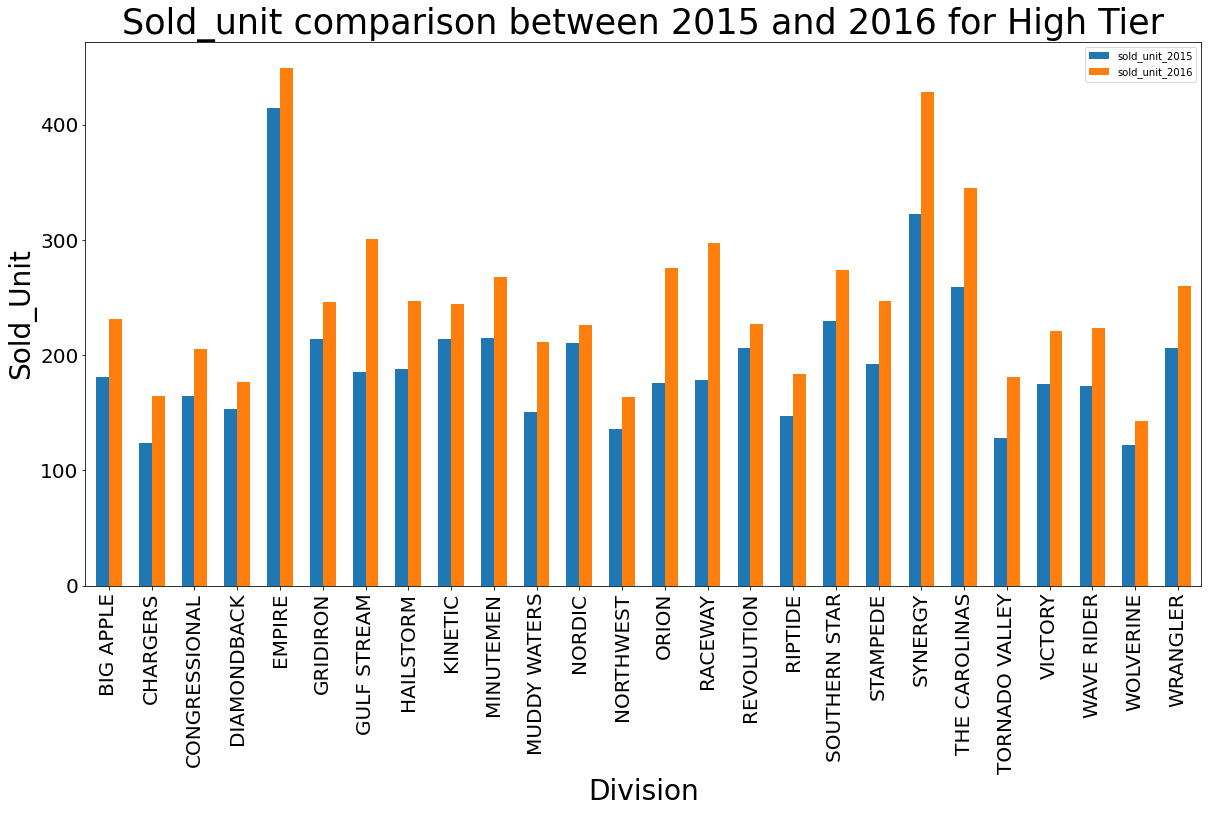

In [248]:
sales_data_Tier_sold.loc["High"].plot.bar(figsize=(20,10),width=0.6, fontsize=20)
plt.ylabel("Sold_Unit",fontsize=28)
plt.xlabel("Division",fontsize=28)
plt.title("Sold_unit comparison between 2015 and 2016 for High Tier", fontsize=35)
plt.show()

In [249]:
## No division show decline in number of units sold in 2016 compared to 2015

## 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported   dataset. The Quarters are based on months and defined as -
## • Jan - Mar : Q1
## • Apr - Jun : Q2
## • Jul - Sep : Q3
## • Oct - Dec : Q4 

In [250]:
sales_data["Qtr"]= np.where(((sales_data.Month=="Jan")|(sales_data.Month=="Mar")),"Q1",np.where(((sales_data.Month=="Apr")|(sales_data.Month=="Jun")),"Q2", np.where(((sales_data.Month=="Jul")|(sales_data.Month=="Sep")),'Q3','Q4')))

## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


In [251]:
sales_data_qtr = sales_data.groupby("Qtr").agg(sold_unit_2015 = ("Units2015","sum"),sold_unit_2016 = ("Units2016","sum"))

<AxesSubplot:xlabel='Qtr'>

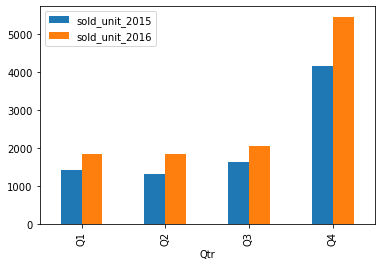

In [252]:
sales_data_qtr.plot.bar()

In [253]:
## With this plot we can say that max sales is done on Q4 (Oct-Dec) for both year 2015-2016

## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart

In [254]:
sales_data_Qtr_Tier = sales_data.groupby(["Qtr","Tier"]).agg(sold_unit_2016 = ("Sales2016","sum"))


In [255]:
sales_data_Qtr_Tier_Q1 = sales_data_Qtr_Tier.loc["Q1"]
sales_data_Qtr_Tier_Q2 = sales_data_Qtr_Tier.loc["Q2"]
sales_data_Qtr_Tier_Q3 = sales_data_Qtr_Tier.loc["Q3"]
sales_data_Qtr_Tier_Q4 = sales_data_Qtr_Tier.loc["Q4"]


sales_data_Qtr_Tier_Q1.drop({"Out"},axis=0,inplace= True)
sales_data_Qtr_Tier_Q2.drop({"Out"},axis=0,inplace= True)
sales_data_Qtr_Tier_Q3.drop({"Out"},axis=0,inplace= True)
sales_data_Qtr_Tier_Q4.drop({"Out"},axis=0,inplace= True)
## AS remove the "out" as it hold 0 and negative values , and we cant plot negative values in pie as it not possible

Text(0.5, 1.0, 'Q1')

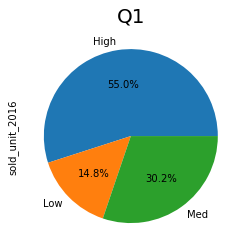

In [256]:
sales_data_Qtr_Tier_Q1.sold_unit_2016.plot.pie(autopct='%1.1f%%')
plt.title("Q1", fontsize=20)


Text(0.5, 1.0, 'Q2')

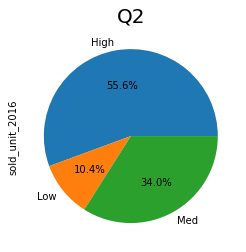

In [257]:
sales_data_Qtr_Tier_Q2.sold_unit_2016.plot.pie(autopct='%1.1f%%')
plt.title("Q2", fontsize=20)

Text(0.5, 1.0, 'Q3')

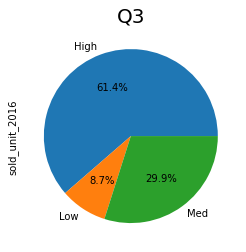

In [258]:
sales_data_Qtr_Tier_Q3.sold_unit_2016.plot.pie(autopct='%1.1f%%')
plt.title("Q3", fontsize=20)

Text(0.5, 1.0, 'Q4')

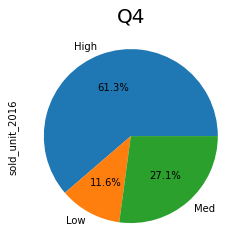

In [259]:
sales_data_Qtr_Tier_Q4.sold_unit_2016.plot.pie(autopct='%1.1f%%')
plt.title("Q4", fontsize=20)